In [18]:
import requests
import pprint

In [ ]:
"""
To get the list of the latest foreign exchange rates
GET /latest
To 
GET /latest?symbols=USD,GBP
"""

In [19]:
base_url = 'https://api.exchangeratesapi.io/'

In [26]:
end_path_latest = 'latest'

In [24]:
"""
exchange USD,CAD
"""
given_currency = input('Provide value that you need to see...')
end_path_exchange = f'latest?symbols={given_currency}&base=USD'

In [25]:
print(end_path_exchange)

latest?symbols=cad&base=USD


In [27]:
end_point = f'{base_url}{end_path_latest}'
# end_point = f'{base_url}{end_path_exchange}'

In [28]:
print(end_point)

https://api.exchangeratesapi.io/latest


In [29]:
result = requests.get(end_point)

In [7]:
"""
the latest exchange rates
"""
# print(result.status_code)
# print(result.json())
pprint.pprint(result.text)

'{"rates":{"CAD":1.5331,"HKD":9.401,"ISK":152.9,"PHP":59.09,"DKK":7.4361,"HUF":361.43,"CZK":26.195,"AUD":1.5605,"RON":4.875,"SEK":10.1388,"IDR":17353.51,"INR":89.5766,"BRL":6.6644,"RUB":90.6697,"HRK":7.583,"JPY":128.83,"THB":36.799,"CHF":1.0986,"SGD":1.6106,"PLN":4.5186,"BGN":1.9558,"TRY":9.0168,"CNY":7.8385,"NOK":10.4012,"NZD":1.6622,"ZAR":18.1025,"USD":1.2121,"MXN":25.2879,"ILS":4.0072,"GBP":0.87053,"KRW":1367.1,"MYR":4.9096},"base":"EUR","date":"2021-02-26"}'


In [31]:
currency = []
exchange_rate = []

In [32]:
data = result.json()
# data.keys()
data['rates']
# print(type(data['rates']))
# print(data['rates']['CAD'])

for key, value in data['rates'].items():
    exchange_rate.append(data['rates'][key])
    currency.append(key)
    # print(data['rates'][key])
    # print(key)

In [84]:
lst = zip(currency, exchange_rate)
# print(*lst)
for data in lst:
    print(data)

('CAD', 1.2648296345)


In [ ]:
"""
exchanger
"""

In [85]:
currency = currency[0]
rate = exchange_rate[0]

amount_to_convert = 10 # 10 USD to CAD
def counter(cur, rt, amount):
    return amount*rate

counter(currency, rate, amount_to_convert)

12.648296345

In [ ]:
"""
graph
"""

In [51]:
import datetime


_base = 'USD'
_currency = 'CAD'
date_until = datetime.datetime.now().strftime('%Y-%m-%d')
date_start = datetime.timedelta(days=7)
date_from = (datetime.datetime.now() - date_start).strftime('%Y-%m-%d')

history_period = f'{base_url}history?start_at={date_from}&end_at={date_until}&symbols={_currency}&base={_base}'

In [46]:
print(history_period)

https://api.exchangeratesapi.io/history?start_at=2021-02-19&end_at=2021-02-26&symbols=CAD&base=USD


In [87]:
history_result = requests.get(history_period)

In [88]:
history_result.text

'{"rates":{"2021-02-24":{"CAD":1.2568746913},"2021-02-26":{"CAD":1.2648296345},"2021-02-22":{"CAD":1.2633314102},"2021-02-25":{"CAD":1.2480163599},"2021-02-23":{"CAD":1.2615498641}},"start_at":"2021-02-20","base":"USD","end_at":"2021-02-27"}'

In [89]:
date = []
_exchange_rate = []

In [90]:
"""
keys - date
values - exchange rate
"""

_result = history_result.json()

for key, value in _result['rates'].items():
    _exchange_rate.append(_result['rates'][key])
    date.append(key)

In [91]:
print(date, '\n', _exchange_rate)

['2021-02-24', '2021-02-26', '2021-02-22', '2021-02-25', '2021-02-23'] 
 [{'CAD': 1.2568746913}, {'CAD': 1.2648296345}, {'CAD': 1.2633314102}, {'CAD': 1.2480163599}, {'CAD': 1.2615498641}]


In [92]:
_exchange_rate_keys = []
_exchange_rate_value = []

for data in _exchange_rate:
    for key, value in data.items():
        _exchange_rate_keys.append(key)
        _exchange_rate_value.append(value)

In [93]:
print(_exchange_rate_keys, '\n', _exchange_rate_value)

['CAD', 'CAD', 'CAD', 'CAD', 'CAD'] 
 [1.2568746913, 1.2648296345, 1.2633314102, 1.2480163599, 1.2615498641]


In [94]:
exchange_rate_result = zip(date, _exchange_rate_value)

In [95]:
print(*exchange_rate_result)

('2021-02-24', 1.2568746913) ('2021-02-26', 1.2648296345) ('2021-02-22', 1.2633314102) ('2021-02-25', 1.2480163599) ('2021-02-23', 1.2615498641)


In [96]:
print(date, '\n', _exchange_rate_value)

['2021-02-24', '2021-02-26', '2021-02-22', '2021-02-25', '2021-02-23'] 
 [1.2568746913, 1.2648296345, 1.2633314102, 1.2480163599, 1.2615498641]


In [102]:
from matplotlib import pyplot as plt 
import os

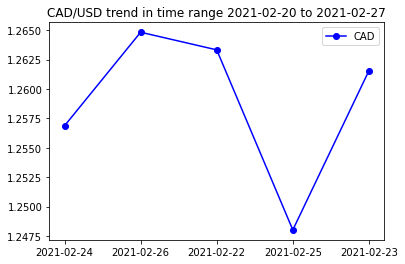

In [112]:
fig = plt.figure()

plt.plot(date, _exchange_rate_value, '-ob')
plt.title(f"{_currency}/{_base} trend in time range {date_from} to {date_until}")
plt.legend([f'{_currency}'])
plt.show()

plot_name = f"temporary_images/{_currency} {_base} trend in time range {date_from} to {date_until}.png"

fig.savefig(plot_name)

In [113]:
if os.path.exists(plot_name):
    os.remove(plot_name)
else: 
    print("File doesn't exists")

In [ ]:
"""
database
"""

In [35]:
"""
check if time overlaps 10 min
 1) if user doesn't exists in the db -> insert new row
 2) if date is the same
 3) if current_time - previous_time <= 10 min 
"""
def insert_into(user, exchange_rates):
    current_date = datetime.now().date().strftime('%Y-%m-%d')
    current_time = datetime.now().time().strftime('%H:%M:%S')

    cur.execute("INSERT INTO data_validator VALUES(?, ?, ?, ?)", (user, current_time, current_date, exchange_rates))
    con.commit()


def validate_if_crossed(current_time, previous_time, previous_date):
    time_limit = datetime.timedelta(min=10)
    
    if previous_date == current_date:
        # if 
        pass
    else:
        # update information in the database about exchange rates and
        pass


def list_to_string(lst):
    return " ".join(lst)


def string_to_list(data):
    return list(data.split(" "))


# I search by user_id, if no rows - no user with this id
def validate_if_exists(data):
    is_exist = False

    for row in data:
        is_exist = True
        return True

    if not is_exist:
        print("No information related with user yet")
        return False

In [1]:
import sqlite3 as lite
import sys
from datetime import date, datetime

In [2]:
con = lite.connect('test.db')

In [25]:
with con: 
    cur = con.cursor()
    cur.execute("CREATE TABLE data_validator(user_id INT PRIMARY KEY NOT NULL, prev_time TEXT NOT NULL, prev_date TEXT NOT NULL, data CHAR(256))")
    # cur.execute("DROP TABLE data_validator")

In [6]:
cur.execute("INSERT INTO data_validator VALUES(231446, '00:00:00', '2018-08-02', 'mylist, blableblu')")
con.commit()

In [21]:
cur.execute("SELECT * FROM data_validator")

rows = cur.fetchall()

for row in rows:
    print(row)

In [8]:
_user_id = 231446
cur.execute(f"SELECT * FROM data_validator WHERE user_id={_user_id}")

In [9]:
rows = cur.fetchall()
result_exist = validate_if_exists(rows)
# user exists, validate date and time
if result_exist == True:
    print(result_exist)
# no user in the database, need to insert: user_id, date, time, data 
else:
    print(result_exist)

True


In [36]:
# test insert
user = 8273918237
exchange_rates = {"rates":{"CAD":1.5331,"HKD":9.401,"ISK":152.9,"PHP":59.09}}
insert_into(user, exchange_rates['rates'])

InterfaceError: Error binding parameter 3 - probably unsupported type.

In [61]:
# convert rates into 2 lists and join with ", "
# split by whitespaces to convert it back to the list when I select data from db
keys = [element for element in exchange_rates['rates'].keys()]
values = [element for element in exchange_rates['rates'].values()]

keys = " ".join(keys)
keys = list(keys.split(" "))
print(keys)

['CAD', 'HKD', 'ISK', 'PHP']


In [19]:
previous_time = rows[0][1]
previous_date = rows[0][2]
current_date = datetime.now().date()
current_time = datetime.now().time().strftime('%H:%M:%S')

In [21]:
print(f"Current time: {current_time}\nCurrent date: {current_date}\nPrevious time: {previous_time}\nPrevious date: {previous_date}")

Current time: 22:28:52
Current date: 2021-03-05
Previous time: 00:00:00
Previous date: 2018-08-02


In [38]:
""" close the connection """
cur.close()